In [1]:
import pandas as pd

# Define the file names
file_names = [
    "../data/workforce-data-report-may-2023.xlsx",
    "../data/workforce-data-report-june-2023.xlsx",
    "../data/workforce-data-report-july-2023.xlsx",
    "../data/workforce-data-report-august-2023.xlsx",
    "../data/workforce-data-report-september-2023.xlsx",
    "../data/workforce-data-report-october-2023.xlsx",
    "../data/workforce-data-report-november-2023.xlsx",
    "../data/workforce-data-report-december-2023.xlsx",
    "../data/workforce-data-report-january-2024.xlsx",
    "../data/workforce-data-report-february-2024.xlsx",
    "../data/workforce-data-report-march-2024.xlsx",
    "../data/workforce-data-report-april-2024.xlsx"
]

# Define labels and initialize dictionary to store values
labels = [
    'inspector target',
    'inspector actual',
    'police sergeant target',
    'police sergeant actual',
    'police constable target',
    'police constable actual',
    'detective constable target',
    'detective constable actual',
    'total target',
    'total actual'
]

data = {label: [] for label in labels}
data['month'] = []

# Iterate over each file and extract the required data
for file_name in file_names:
    # Extract month from file name for reference
    month = file_name.split('-')[-2] + '-' + file_name.split('-')[-1].split('.')[0]
    
    # Read the data from the specific sheet
    df = pd.read_excel(file_name, sheet_name='Schools & Youth')
    
    # Extract the row at index 211 (0-based index)
    row_213_data = df.iloc[211]
    
    # Assign values to the respective labels
    data['month'].append(month)
    data['inspector target'].append(row_213_data[3])
    data['inspector actual'].append(row_213_data[4])
    data['police sergeant target'].append(row_213_data[5])
    data['police sergeant actual'].append(row_213_data[6])
    data['police constable target'].append(row_213_data[7])
    data['police constable actual'].append(row_213_data[8])
    data['detective constable target'].append(row_213_data[9])
    data['detective constable actual'].append(row_213_data[10])
    data['total target'].append(row_213_data[11])
    data['total actual'].append(row_213_data[12])

# Convert the dictionary to a DataFrame for easy manipulation and display
results_df = pd.DataFrame(data)

# Display the results
print(results_df)


    inspector target inspector actual  police sergeant target  \
0                6.0              4.6                      39   
1                6.0              4.6                      39   
2                6.0              4.6                      39   
3                NaN            Total                       6   
4                6.0              5.6                      39   
5                6.0              5.6                      39   
6                6.0              5.6                      39   
7                6.0              5.6                      39   
8                0.0              2.9                       0   
9                5.0              2.9                      38   
10               5.0              2.9                      38   
11               5.0              1.9                      38   

    police sergeant actual  police constable target  police constable actual  \
0                 46.33425                   402.19                337.694

In [2]:
# Manually modify the data for 'august-2023'
index_august = results_df[results_df['month'] == 'august-2023'].index[0]

# Update the values for the 'august-2023' row
results_df.at[index_august, 'inspector target'] = 6
results_df.at[index_august, 'inspector actual'] = 4.6
results_df.at[index_august, 'police sergeant target'] = 39
results_df.at[index_august, 'police sergeant actual'] = 44.33
results_df.at[index_august, 'police constable target'] = 402.19
results_df.at[index_august, 'police constable actual'] = 336.69
results_df.at[index_august, 'detective constable target'] = 0
results_df.at[index_august, 'detective constable actual'] = 0
results_df.at[index_august, 'total target'] = 447.19
results_df.at[index_august, 'total actual'] = 385.62

# Display the updated results
print(results_df)


    inspector target inspector actual  police sergeant target  \
0                6.0              4.6                      39   
1                6.0              4.6                      39   
2                6.0              4.6                      39   
3                6.0              4.6                      39   
4                6.0              5.6                      39   
5                6.0              5.6                      39   
6                6.0              5.6                      39   
7                6.0              5.6                      39   
8                0.0              2.9                       0   
9                5.0              2.9                      38   
10               5.0              2.9                      38   
11               5.0              1.9                      38   

    police sergeant actual  police constable target  police constable actual  \
0                 46.33425                   402.19                337.694

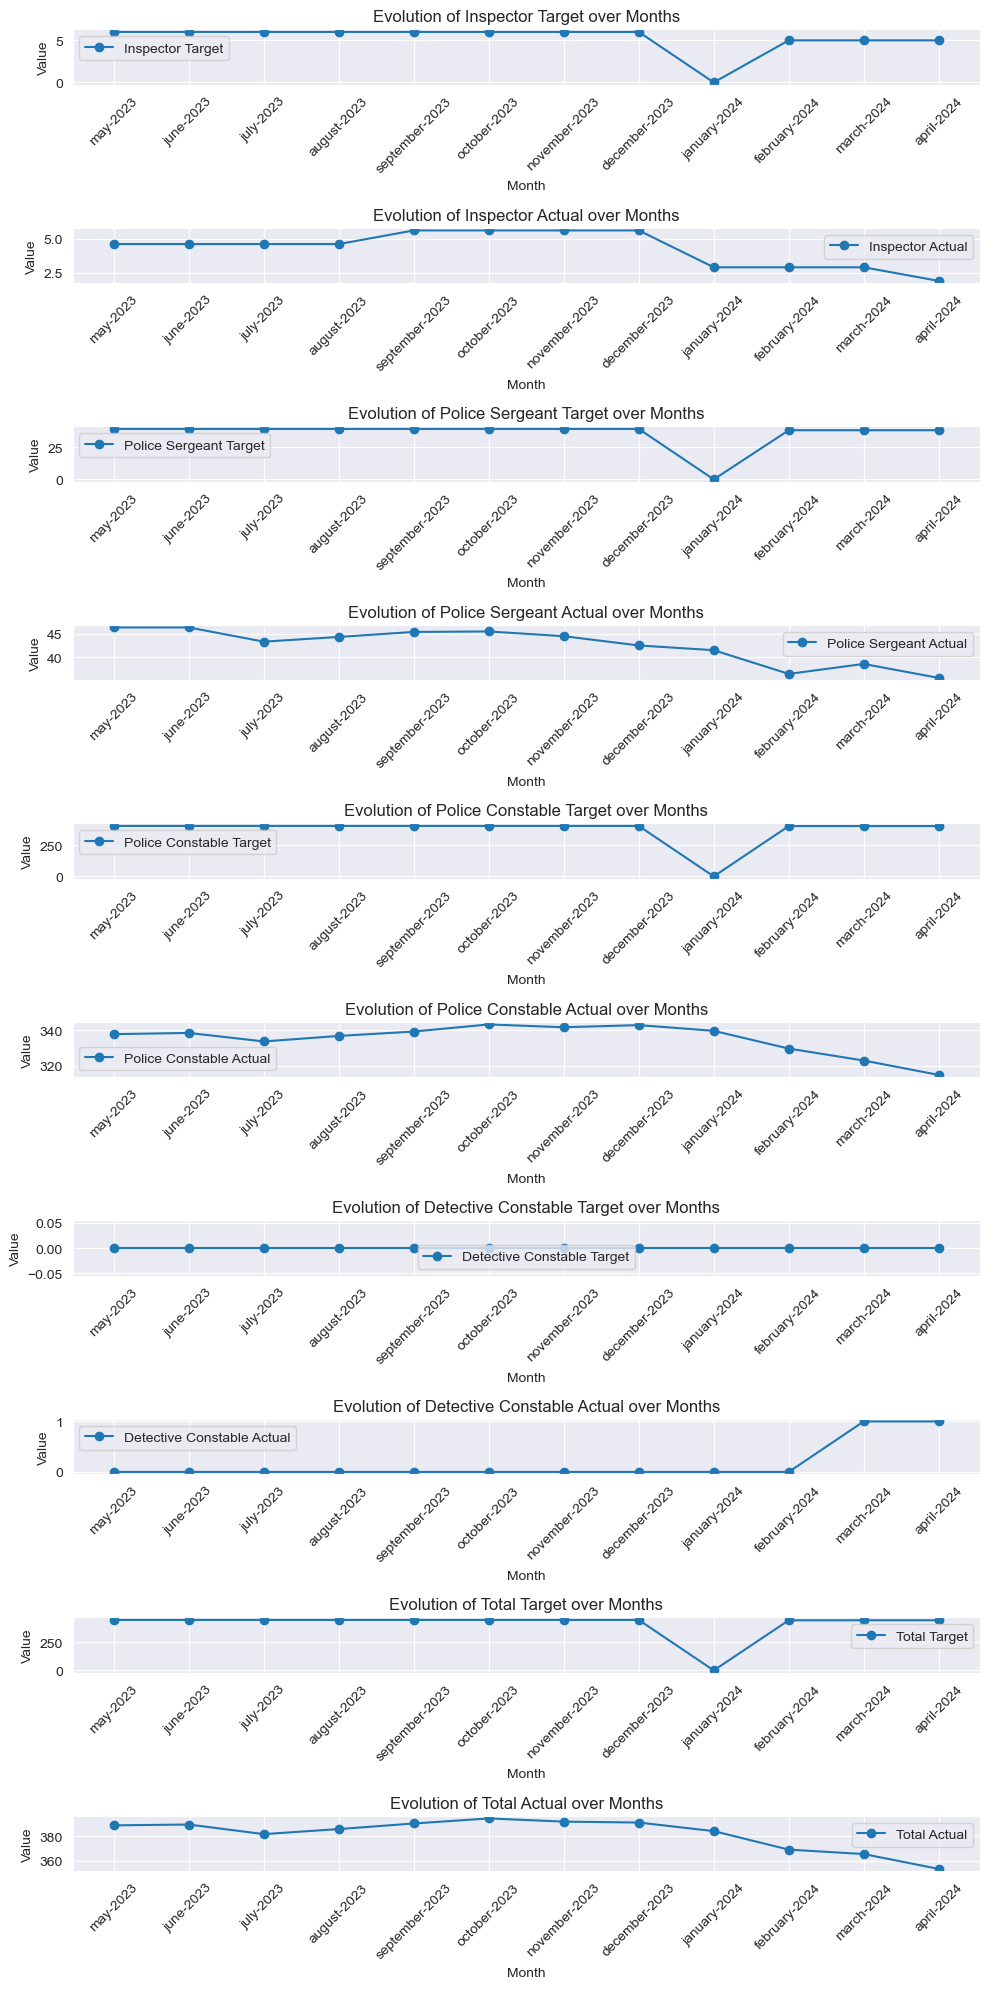

In [3]:
import matplotlib.pyplot as plt

# Define labels for plotting
labels = [
    'inspector target',
    'inspector actual',
    'police sergeant target',
    'police sergeant actual',
    'police constable target',
    'police constable actual',
    'detective constable target',
    'detective constable actual',
    'total target',
    'total actual'
]

# Create subplots for each label
fig, axes = plt.subplots(nrows=len(labels), figsize=(10, 20))

# Plot each label over months
for i, label in enumerate(labels):
    axes[i].plot(results_df['month'], results_df[label], marker='o', linestyle='-', label=label.replace('_', ' ').title())
    axes[i].set_title(f'Evolution of {label.replace("_", " ").title()} over Months')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Value')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


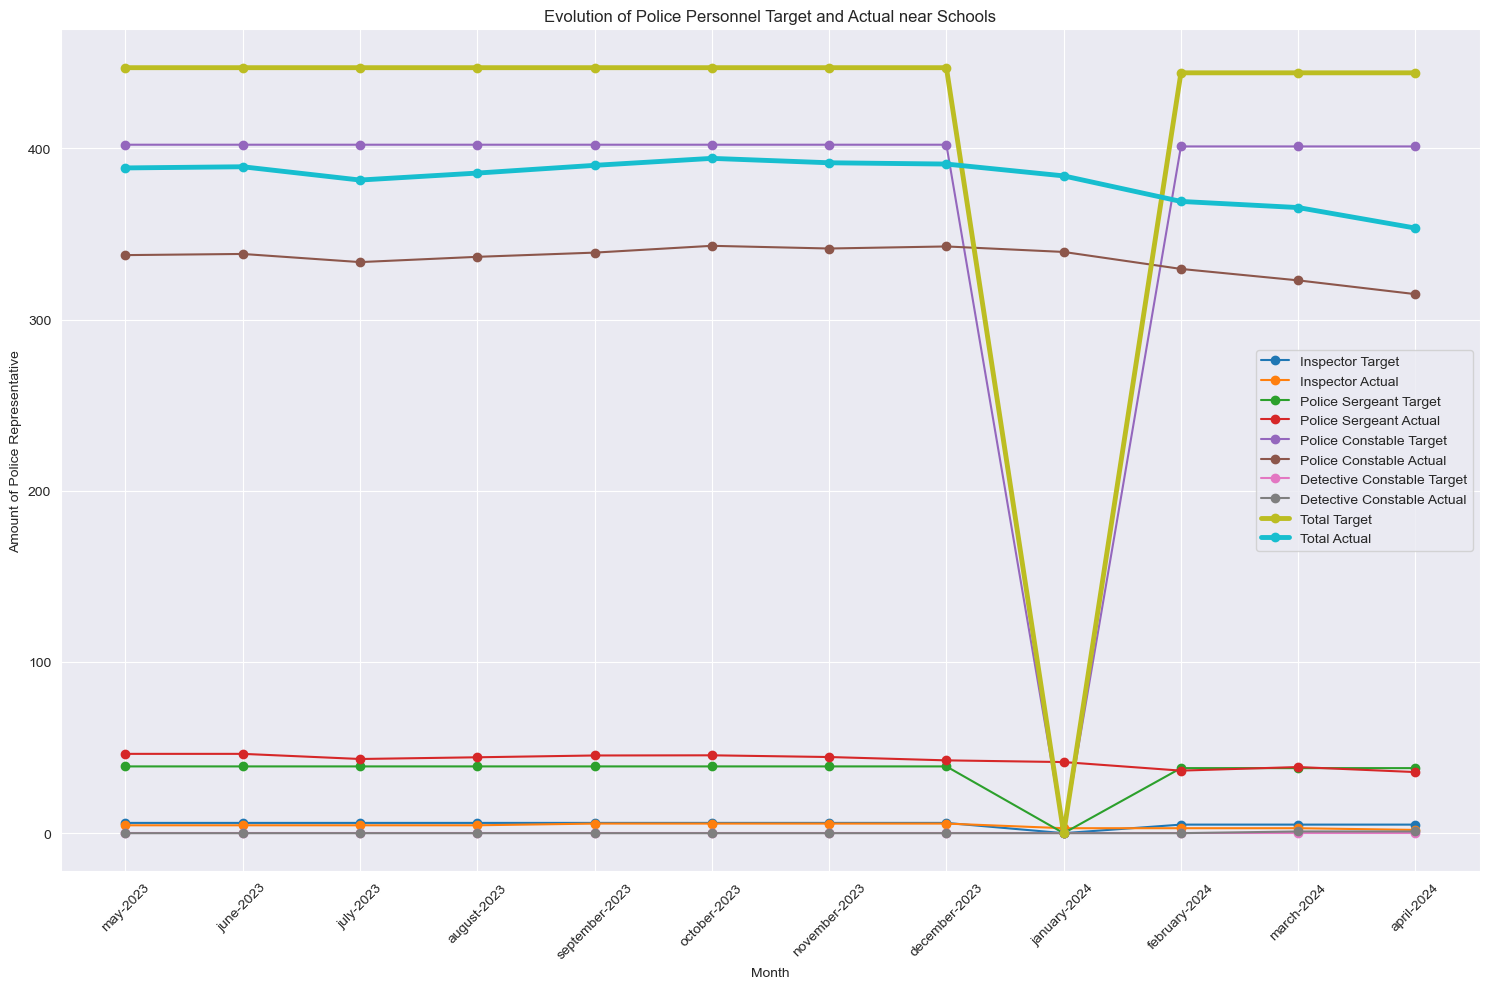

In [4]:
import matplotlib.pyplot as plt

# Increase the figure size and font size
plt.figure(figsize=(15, 10))

# Plot each label over months
for label in labels:
    if 'total' in label:  # Check if the label contains 'total'
        plt.plot(results_df['month'], results_df[label], marker='o', linestyle='-', label=label.replace('_', ' ').title(), linewidth=3.5)
    else:
        plt.plot(results_df['month'], results_df[label], marker='o', linestyle='-', label=label.replace('_', ' ').title())

# Set plot title and labels
plt.title('Evolution of Police Personnel Target and Actual near Schools')
plt.xlabel('Month')
plt.ylabel('Amount of Police Representative')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
